In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.패키지 로드 및 데이터 로드

In [2]:
import numpy as np
import pandas as pd

from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

import matplotlib.pyplot as plt

In [3]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 302 kB/s 
     |████████████████████████████████| 448 kB 66.1 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 18.84 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-04-20 00:23:02--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

In [4]:
from konlpy.tag import Mecab

mecab = Mecab() 
mecab.morphs('설치 잘 됐겠지?')

['설치', '잘', '됐', '겠', '지', '?']

In [5]:
total_data = pd.read_csv('/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/DATA/human_0.05_318091_1650413633.8778849.csv', index_col= 0)

print('전체 데이터 갯수 :', len(total_data))

전체 데이터 갯수 : 318091


In [58]:
set(total_data['key'])

{'None', '가족', '어린이', '친구', '커플', '혼자'}

In [6]:
total_data

,data,key,label
0,애들이랑 근처에 동물관련된 곳 가서 알려줘,어린이,0
1,남사친과 성산근처 추천해줄래?,친구,0
2,여자친구와 핸드메이드근처 근처 추천해줘,커플,0
3,홀로유명한 우도관련된 곳 가서 알려줄래?,혼자,0
4,남자친구와 여기 금오름관련된 곳 가서 근처 추천해줘,커플,0
...,...,...,...
318086,가족이랑 이쪽에 우도관련된 곳 가서 언제 도착해?,가족,2
318087,여자 친구와 근방에 커플스냅언제 거기 닫혀?,커플,2
318088,부모님과 나 니모메술관련된 곳 가서 언제 브레이크타임이야?브레이크타임 언제야?,가족,2
318089,여자 친구와 가까운 매점근처 언제 거기 닫혀?,커플,2


# 2.데이터전처리

## 훈련데이터와 테스트데이터를 분리

In [7]:
total_data.drop_duplicates(subset='data', inplace=True)

In [8]:
total_data.reset_index(drop=True, inplace=True)

In [9]:
total_data.isnull().sum()

data     0
key      0
label    0
dtype: int64

In [10]:
total_data

,data,key,label
0,애들이랑 근처에 동물관련된 곳 가서 알려줘,어린이,0
1,남사친과 성산근처 추천해줄래?,친구,0
2,여자친구와 핸드메이드근처 근처 추천해줘,커플,0
3,홀로유명한 우도관련된 곳 가서 알려줄래?,혼자,0
4,남자친구와 여기 금오름관련된 곳 가서 근처 추천해줘,커플,0
...,...,...,...
316459,가족이랑 이쪽에 우도관련된 곳 가서 언제 도착해?,가족,2
316460,여자 친구와 근방에 커플스냅언제 거기 닫혀?,커플,2
316461,부모님과 나 니모메술관련된 곳 가서 언제 브레이크타임이야?브레이크타임 언제야?,가족,2
316462,여자 친구와 가까운 매점근처 언제 거기 닫혀?,커플,2


In [11]:
train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=42, stratify=total_data['key'])
print('훈련용 데이터의 갯수 :', len(train_data))
print('테스트용 데이터의 갯수 :', len(test_data))

훈련용 데이터의 갯수 : 237348
테스트용 데이터의 갯수 : 79116


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

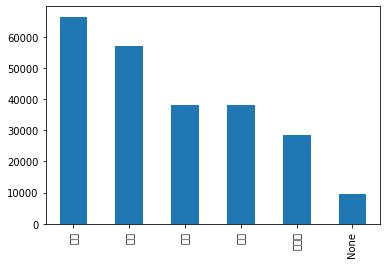

In [12]:
train_data['key'].value_counts().plot(kind='bar') 

In [13]:
print(train_data.groupby('key').size().reset_index(name='count'))

    key  count
0  None   9497
1    가족  37967
2   어린이  28486
3    친구  66443
4    커플  56966
5    혼자  37989


## 데이터 정제 2

In [14]:
train_data['data'].replace('', np.nan, inplace=True)

In [15]:
print(train_data.isnull().sum())

data     0
key      0
label    0
dtype: int64


## Test data 정제

In [16]:
#1. 중복 제거
test_data.drop_duplicates(subset='data', inplace=True)

#2. 정규표현식을 이용하여 한글 외 문자 제거
# test_data['data'] = test_data['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")

#3. 공백을 null 변경
test_data['data'].replace('', np.nan, inplace = True)

#4. Null값 제거
test_data['data'].dropna(how='any')

#5. 테스트 갯수 반환
print('테스트용 리뷰의 갯수 :', len(test_data))

테스트용 리뷰의 갯수 : 79116


## 불용어 제거

In [17]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [18]:
from konlpy.tag import Okt
# from konlpy.tag import Mecab
from konlpy.tag import Komoran

In [19]:
# mecab = Mecab()
okt = Okt()
komoran = Komoran()

In [20]:
train_data['tokenized'] = train_data['data'].apply(mecab.morphs) # 형태소 분석완료
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

test_data['tokenized'] = test_data['data'].apply(mecab.morphs) # 형태소 분석완료
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [21]:
len(list(set(total_data['key'])))

6

In [22]:
train_data.head()

,data,key,label,tokenized
107911,둘이서 근처에 제주4.3 근처 추천해줘,친구,0,"[둘, 서, 근처, 제주, 4, ., 3, 근처, 추천, 해, 줘]"
218278,여자친구와 이쪽에 천연염색관련된 곳 가서 알려줘,커플,2,"[여자, 친구, 이쪽, 천연, 염색, 관련, 된, 곳, 서, 알려줘]"
208779,아이와유명한 수목원어느 쪽이야?,어린이,2,"[아이, 유명, 수목원, 어느, 쪽, 야, ?]"
249140,남사친이랑가까운 화방관련된 곳 가서 언제 도착해?,친구,2,"[남, 사친, 이랑, 가까운, 화방, 관련, 된, 곳, 서, 언제, 도착, 해, ?]"
240740,가족들이랑 신창근처 언제 거기 열어?,가족,2,"[가족, 이랑, 신창, 근처, 언제, 거기, 열, 어, ?]"


In [23]:
test_data.head()

,data,key,label,tokenized
162322,친구들이랑가는 길에 숙소어디에 있어?,친구,2,"[친구, 이랑, 길, 숙, 소, 어디, 있, 어, ?]"
212728,애들이랑 유명한 라이딩관련된 곳 가서 어느 위치에 있어?,어린이,2,"[애, 이랑, 유명, 라이, 딩, 관련, 된, 곳, 서, 어느, 위치, 있, 어, ?]"
186603,커플끼리 근처에 커플스냅알려줘,커플,2,"[커플, 끼리, 근처, 커플, 스냅, 알려줘]"
62602,아이와여기 체험여행관련된 곳 가서 알려줘,어린이,0,"[아이, 여기, 체험, 여행, 관련, 된, 곳, 서, 알려줘]"
237054,여자친구와 나 마을관광관련된 곳 가서 어딨어?,커플,2,"[여자, 친구, 나, 마을, 관광, 관련, 된, 곳, 서, 어딨, 어, ?]"


## 단어와 길이 분포 확인

In [24]:
set(train_data['key'])

{'None', '가족', '어린이', '친구', '커플', '혼자'}

In [25]:
x_train = train_data['tokenized'].values
y_train = train_data['key'].values
x_test = test_data['tokenized'].values
y_test = test_data['key'].values

In [26]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[list(['둘', '서', '근처', '제주', '4', '.', '3', '근처', '추천', '해', '줘'])
 list(['여자', '친구', '이쪽', '천연', '염색', '관련', '된', '곳', '서', '알려줘'])
 list(['아이', '유명', '수목원', '어느', '쪽', '야', '?']) ...
 list(['혼자', '서', '성산', '근처', '얼마나', '걸려', '?'])
 list(['부모', '님', '나', '행사', '관련', '된', '곳', '서', '갈', '만', '곳', '추천', '해', '줘'])
 list(['홀로', '이쪽', '주스', '근처', '일식', '추천', '해', '줘'])]
['친구' '커플' '어린이' ... '혼자' '가족' '혼자']
[list(['친구', '이랑', '길', '숙', '소', '어디', '있', '어', '?'])
 list(['애', '이랑', '유명', '라이', '딩', '관련', '된', '곳', '서', '어느', '위치', '있', '어', '?'])
 list(['커플', '끼리', '근처', '커플', '스냅', '알려줘']) ...
 list(['여', '사친', '이랑', '길', '곽지', '근처', '갈만', '곳', '추천', '해', '줘'])
 list(['남', '사친', '이랑', '여기', '행사', '근처', '근처', '추천', '해', '줘'])
 list(['가족', '이랑', '길', '도보', '어딨', '어', '?'])]
['친구' '어린이' '커플' ... '친구' '친구' '가족']


## 정수 인코딩

In [27]:
vocab_size = 10000
t = Tokenizer(vocab_size, oov_token='OOV')
t.fit_on_texts(x_train)

In [28]:
threshold = 2
total_cnt = len(t.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in t.word_counts.items():
    total_freq = total_freq + value

    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합 (vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀단어의 수 : %s' %(threshold-1, rare_cnt))
print('단어 집합에서 희귀단어의 비율 :', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀단어 등장 빈도 비율 :', (rare_freq/total_freq)* 100)

단어 집합 (vocabulary)의 크기 : 613
등장 빈도가 1번 이하인 희귀단어의 수 : 16
단어 집합에서 희귀단어의 비율 : 2.6101141924959217
전체 등장 빈도에서 희귀단어 등장 빈도 비율 : 0.000669076457039437


In [29]:
# 전체 단어 갯수 중 빈도수 2이하인 단어 갯수는 제거.
# 0번 패딩 토큰과 1번 OOV토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 599


In [30]:
original_vocab_size = vocab_size + rare_cnt -2
print('원래 vocab size :', original_vocab_size)

원래 vocab size : 613


In [31]:
x_train[0]

['둘', '서', '근처', '제주', '4', '.', '3', '근처', '추천', '해', '줘']

In [32]:
t = Tokenizer(vocab_size, oov_token='OOV')
t.fit_on_texts(x_train)

x_train = t.texts_to_sequences(x_train)
x_test = t.texts_to_sequences(x_test)

In [33]:
print(x_train[:3])
print(x_test[:3])

[[57, 5, 4, 80, 121, 122, 123, 4, 14, 9, 18], [30, 13, 24, 404, 340, 8, 7, 3, 5, 15], [31, 23, 163, 38, 46, 12, 2]]
[[13, 6, 21, 533, 534, 37, 40, 10, 2], [56, 6, 23, 265, 266, 8, 7, 3, 5, 38, 68, 40, 10, 2], [51, 58, 4, 51, 159, 15]]


## 패딩(Padding)

데이터의 최대 길이 : 22
데이터의 평균 길이 : 10.075315570386099


Text(0, 0.5, 'number of samples')

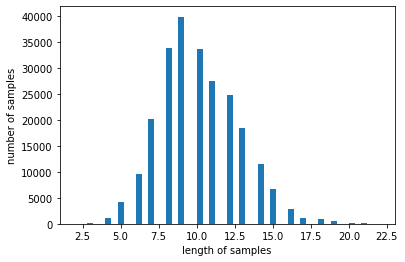

In [34]:
print('데이터의 최대 길이 :', max(len(l) for l in x_train))
print('데이터의 평균 길이 :', sum(map(len, x_train))/len(x_train))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

In [35]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if (len(s) <= max_len):
            cnt = cnt + 1

    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율 : %s' % (max_len, (cnt/len(nested_list))*100))

In [36]:
max_len = 15
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 15 이하인 샘플의 비율 : 97.54958963210139


In [37]:
x_train = pad_sequences(x_train, maxlen = max_len)
x_test = pad_sequences(x_test, maxlen = max_len)

print(x_train.shape)
print(x_test.shape)

(237348, 15)
(79116, 15)


In [38]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

# 3.학습

## 모델 정의

In [40]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
embedding_dim = 100
hidden_size = 128

model_gru = Sequential()
model_gru.add(Embedding(vocab_size, 100))
model_gru.add(GRU(hidden_size, return_sequences = True))
model_gru.add(GRU(hidden_size))
model_gru.add(Dense(len(list(set(total_data['key']))), activation='softmax'))
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         59900     
                                                                 
 gru (GRU)                   (None, None, 128)         88320     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 248,066
Trainable params: 248,066
Non-trainable params: 0
_________________________________________________________________


In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('hyerim_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [43]:
y_train

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [44]:
type(x_train), type(x_train),

(numpy.ndarray, numpy.ndarray)

In [45]:
epoch = 5

model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
history_gru = model_gru.fit(x_train, y_train, epochs=epoch, callbacks=[es, mc], batch_size=60)

Epoch 1/5
3956/3956 [==============================] - 38s 7ms/step - loss: 0.0566 - acc: 0.9765
Epoch 2/5
3956/3956 [==============================] - 27s 7ms/step - loss: 0.0272 - acc: 0.9878
Epoch 3/5
3956/3956 [==============================] - 26s 7ms/step - loss: 0.0260 - acc: 0.9884
Epoch 4/5
3956/3956 [==============================] - 26s 7ms/step - loss: 0.0258 - acc: 0.9886
Epoch 5/5
3956/3956 [==============================] - 26s 7ms/step - loss: 0.0253 - acc: 0.9888


In [46]:
model_gru.evaluate(x_test, y_test)[1] # [1]은 acc를 의미하고 acc를 저장한다는 의미

2473/2473 [==============================] - 9s 4ms/step - loss: 0.0270 - acc: 0.9880


0.9880302548408508

# 4.예측하기

In [47]:
def sentiment_predict(new_sentence):
    new_sentence = mecab.morphs(new_sentence) # 형태소 분석 tokenizer

    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거

    encoded = t.texts_to_sequences([new_sentence]) # 텍스트 > 정수 시퀀스
    pad_new = pad_sequences(encoded, maxlen=max_len) # 패딩
    score = model_gru.predict(pad_new)
    print(np.argmax(score))


In [70]:
for i in range(6):
    print('{} : {}'.format(i, le.inverse_transform([i])))

0 : ['None']
1 : ['가족']
2 : ['어린이']
3 : ['친구']
4 : ['커플']
5 : ['혼자']


In [68]:
#  0 : ['None'], 1 : ['가족'], 2 : ['어린이'], 3 : ['친구'], 4 : ['커플'], 5 : ['혼자']
sentiment_predict('여자친구랑 서귀포 가고 싶어')

4


# 5.모델 저장

In [49]:
from time import time

# 실수로 모델이 덮어씌워지는 것을 방지하기 위해 만든 장치
tt = time()

In [50]:
path = '/content/drive/MyDrive/YGL/Final_Project/Final_Project_Sharing/민경태/Result/'

# 모델 저장
model_save_name = path + 'model_catbot_human' + '_e_' + str(epoch) + '_dl_' + str(len(total_data)) + '_' +  str(tt) + '.h5'

model_gru.save(model_save_name)

In [51]:
# 단어장 저장
import json

word_index = t.word_index
json = json.dumps(word_index)
f = open(path + "human_wordIndex.json", "w")
f.write(json)
f.close()

In [52]:
# 불러오기
# new_model = tf.keras.models.load_model(model_save_name)
# test_loss, test_acc = new_model.evaluate(x,  y, verbose=2)